In [1]:
from scrape import extract_players
from scrape import extract_year
from scrape import make_dists
from scrape import extract_age
from scrape import run_knn
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import re
import matplotlib.pyplot as plt
from scrape import read_targets
from scrape import clean_name
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from scrape import model_2023

In [2]:
df2022 = extract_players("2022", "wr", "PPR")

In [3]:
names2022 = list(df2022["name"].head(100))
dists2022 = make_dists(names2022, "2022", "wr")
dists2022.head(20)

justin-jefferson
tyreek-hill
davante-adams
stefon-diggs
ceedee-lamb
aj-brown
amonra-stbrown
jaylen-waddle
devonta-smith
amari-cooper
jamarr-chase
christian-kirk
tyler-lockett
terry-mclaurin
brandon-aiyuk
dk-metcalf
mike-evans
tee-higgins
chris-godwin
michael-pittman
garrett-wilson
jerry-jeudy
cooper-kupp
dj-moore-wr
chris-olave
zay-jones
juju-smith-schuster
diontae-johnson
jakobi-meyers
adam-thielen
drake-london
mike-williams-wr
curtis-samuel
tyler-boyd
allen-lazard
gabriel-davis
josh-palmer
deebo-samuel
donovan-peoples-jones
george-pickens
christian-watson
keenan-allen
courtland-sutton
marquise-brown
kj-osborn
mack-hollins
deandre-hopkins
parris-campbell
brandin-cooks
richie-james
jahan-dotson
darius-slayton
russell-gage
marquez-valdesscantling
isaiah-mckenzie
marvin-jones
kalif-raymond
devin-duvernay
robert-woods
chris-moore
noah-brown
greg-dortch
deandre-carter
alec-pierce
olamide-zaccheaus
michael-gallup
chase-claypool
josh-reynolds
demarcus-robinson
devante-parker
romeo-doubs
darn

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,std_rec,avg_tgt,std_tgt,avg_yds,std_yds,avg_ypr,...,avg_ryds,std_ryds,avg_rypa,std_rypa,avg_rlg,std_rlg,avg_rTD,std_rTD,TM TGT %,class
0,justin-jefferson,23,17,7.529412,3.362731,10.823529,3.868961,106.411765,62.947278,13.494118,...,1.411765,3.396518,1.088235,2.647059,1.235294,2.941176,0.058824,0.235294,27.4,0
1,tyreek-hill,28,17,7.000000,3.124853,10.000000,3.597385,100.588235,54.284717,14.576471,...,1.882353,3.628034,1.500000,2.645751,1.705882,3.120421,0.058824,0.235294,29.1,0
2,davante-adams,29,17,5.882353,2.887750,10.588235,3.326521,89.176471,53.909767,14.752941,...,-0.058824,1.392019,-0.058824,1.392019,-0.058824,1.392019,0.000000,0.000000,30.7,0
3,stefon-diggs,28,17,6.470588,2.972771,9.176471,4.105023,85.588235,37.897786,13.441176,...,-0.176471,0.705882,-0.176471,0.705882,-0.176471,0.705882,0.000000,0.000000,26.8,0
4,ceedee-lamb,23,17,6.294118,2.395209,9.176471,2.854002,79.941176,32.482521,12.941176,...,2.764706,6.207485,1.500000,3.417085,2.235294,4.684510,0.000000,0.000000,28.1,0
5,aj-brown,25,17,5.176471,2.120913,8.529412,2.789005,88.000000,44.290485,16.382353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.2,0
6,amonra-stbrown,22,16,6.625000,2.471715,9.125000,2.955398,72.562500,32.595952,10.556250,...,5.937500,16.211372,3.812500,8.171741,5.312500,13.823525,0.000000,0.000000,24.8,1
7,jaylen-waddle,23,17,4.411765,2.302398,6.882353,3.546039,79.764706,43.283646,18.235294,...,1.529412,3.309836,1.529412,3.309836,1.529412,3.309836,0.000000,0.000000,20.0,0
8,devonta-smith,23,17,5.588235,2.450902,8.000000,2.930569,70.352941,43.784151,11.658824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.4,0
9,amari-cooper,28,17,4.588235,2.276706,7.764706,3.334832,68.235294,34.415334,15.841176,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.4,0


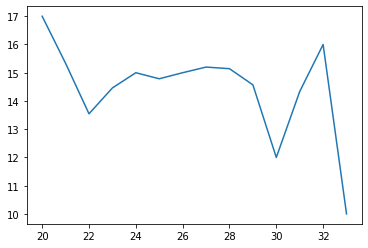

In [4]:
agepergames = dists2022[['age', 'games_played']]
df = agepergames.groupby('age')['games_played'].mean()
plt.plot(df)
plt.show()

2021 Data

In [5]:
df2021 = extract_players("2021", "wr", "PPR")

In [6]:
names2021 = list(df2021["name"].head(100))
dists2021 = make_dists(names2021, "2021", "wr")
dists2021.head(20)

cooper-kupp
davante-adams
deebo-samuel
justin-jefferson
jamarr-chase
tyreek-hill
stefon-diggs
diontae-johnson
mike-evans
hunter-renfrow
keenan-allen
mike-williams-wr
jaylen-waddle
dk-metcalf
chris-godwin
tyler-lockett
michael-pittman
dj-moore-wr
ceedee-lamb
brandin-cooks
amonra-stbrown
marquise-brown
darnell-mooney
tee-higgins
terry-mclaurin
christian-kirk
amari-cooper
adam-thielen
jakobi-meyers
devonta-smith
tyler-boyd
aj-brown
kendrick-bourne
marvin-jones
brandon-aiyuk
van-jefferson
chase-claypool
russell-gage
cole-beasley
kj-osborn
aj-green
tim-patrick
marquez-callaway
courtland-sutton
cedrick-wilson
deandre-hopkins
allen-lazard
mecole-hardman
robby-anderson
elijah-moore
robert-woods
jarvis-landry
kalif-raymond
emmanuel-sanders
odell-beckham
laviska-shenault
byron-pringle
gabriel-davis
antonio-brown
braxton-berrios
quez-watkins
deonte-harty
donovan-peoples-jones
jamison-crowder
bryan-edwards
rondale-moore
nick-westbrook
zay-jones
corey-davis
devante-parker
rashod-bateman
nelson-agho

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,std_rec,avg_tgt,std_tgt,avg_yds,std_yds,avg_ypr,...,avg_ryds,std_ryds,avg_rypa,std_rypa,avg_rlg,std_rlg,avg_rTD,std_rTD,TM TGT %,class
0,cooper-kupp,28,17,8.529412,2.003457,11.235294,2.183613,114.529412,23.889741,13.776471,...,1.058824,4.517555,1.058824,4.517555,1.058824,4.517555,0.000000,0.000000,31.5,0
1,davante-adams,28,16,7.687500,2.337701,10.562500,3.656651,97.062500,41.589465,12.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.5,0
2,deebo-samuel,25,16,4.812500,2.554867,7.562500,3.445445,87.812500,54.051155,17.937500,...,22.812500,24.264735,4.387500,4.128086,11.375000,12.878640,0.500000,0.612372,23.5,1
3,justin-jefferson,22,17,6.352941,2.299391,9.823529,2.955260,95.058824,41.551486,15.076471,...,0.823529,3.276212,0.823529,3.276212,0.823529,3.276212,0.000000,0.000000,27.6,0
4,jamarr-chase,21,17,4.764706,2.413916,7.529412,2.892539,85.588235,66.642204,16.394118,...,1.235294,3.058824,1.000000,2.656845,1.352941,3.342088,0.000000,0.000000,23.1,0
5,tyreek-hill,27,17,6.529412,3.533331,9.352941,4.405093,72.882353,55.164868,10.258824,...,5.647059,9.336463,5.647059,9.336463,5.647059,9.336463,0.000000,0.000000,23.6,0
6,stefon-diggs,27,17,6.058824,2.013793,9.647059,2.764080,72.058824,31.132488,12.723529,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.2,0
7,diontae-johnson,25,16,6.687500,1.927393,10.562500,3.463538,72.562500,25.034898,12.062500,...,3.312500,6.705583,2.968750,6.438334,3.312500,6.705583,0.000000,0.000000,25.5,0
8,mike-evans,27,16,4.625000,2.117634,7.125000,3.018174,64.687500,31.150278,14.650000,...,0.625000,2.420615,0.625000,2.420615,0.625000,2.420615,0.000000,0.000000,15.6,0
9,hunter-renfrow,25,17,6.058824,2.460765,7.529412,2.592243,61.058824,31.206090,10.117647,...,0.176471,1.617380,0.176471,1.617380,0.176471,1.617380,0.000000,0.000000,20.4,0


2020 Data

In [7]:
df2020 = extract_players("2020", "wr", "PPR")

In [8]:
names2020 = list(df2020["name"].head(100))
dists2020 = make_dists(names2020, "2020", "wr")
dists2020.head(20)

davante-adams
tyreek-hill
stefon-diggs
deandre-hopkins
calvin-ridley
justin-jefferson
dk-metcalf
tyler-lockett
allen-robinson
adam-thielen
mike-evans
aj-brown
robert-woods
keenan-allen
amari-cooper
juju-smith-schuster
brandin-cooks
marvin-jones
robby-anderson
terry-mclaurin
diontae-johnson
ceedee-lamb
chase-claypool
curtis-samuel
dj-moore-wr
cooper-kupp
cole-beasley
tee-higgins
tyler-boyd
corey-davis
chris-godwin
will-fuller
jarvis-landry
nelson-agholor
brandon-aiyuk
marquise-brown
russell-gage
michael-gallup
jamison-crowder
devante-parker
emmanuel-sanders
ty-hilton
sterling-shepard
tim-patrick
jerry-jeudy
laviska-shenault
keelan-cole
mike-williams-wr
dj-chark
darnell-mooney
christian-kirk
julio-jones
jakobi-meyers
darius-slayton
marquez-valdesscantling
gabriel-davis
zach-pascal
greg-ward
hunter-renfrow
kendrick-bourne
mecole-hardman
josh-reynolds
rashard-higgins
david-moore
antonio-brown
travis-fulgham
damiere-byrd
aj-green
anthony-miller
demarcus-robinson
danny-amendola
trequan-smith

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,std_rec,avg_tgt,std_tgt,avg_yds,std_yds,avg_ypr,...,avg_ryds,std_ryds,avg_rypa,std_rypa,avg_rlg,std_rlg,avg_rTD,std_rTD,TM TGT %,class
0,davante-adams,27,14,8.214286,2.907590,10.642857,3.414405,98.142857,51.326486,11.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.9,0
1,tyreek-hill,26,15,5.800000,2.879815,9.000000,4.049691,85.066667,54.578954,15.366667,...,8.200000,11.373654,6.766667,10.297033,8.000000,10.733126,0.133333,0.339935,21.3,1
2,stefon-diggs,26,16,7.937500,1.951562,10.375000,2.619041,95.937500,36.361843,12.100000,...,0.062500,0.242061,0.062500,0.242061,0.062500,0.242061,0.000000,0.000000,3.4,0
3,deandre-hopkins,28,16,7.187500,2.920162,10.000000,2.958040,87.937500,45.545950,13.250000,...,0.062500,0.242061,0.062500,0.242061,0.062500,0.242061,0.000000,0.000000,27.8,0
4,calvin-ridley,25,15,6.000000,2.422120,9.533333,2.777689,91.600000,42.877811,14.613333,...,0.066667,3.641733,0.066667,3.641733,0.066667,3.641733,0.000000,0.000000,22.8,0
5,justin-jefferson,21,16,5.500000,2.524876,7.812500,3.468046,87.500000,47.838269,15.962500,...,0.125000,0.484123,0.125000,0.484123,0.125000,0.484123,0.000000,0.000000,24.2,0
6,dk-metcalf,22,16,5.187500,2.627231,8.062500,2.860698,81.437500,44.438115,15.950000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0
7,tyler-lockett,27,16,6.250000,3.455069,8.250000,4.160829,65.875000,41.007431,10.887500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.7,0
8,allen-robinson,26,16,6.375000,2.446298,9.437500,3.316036,78.125000,26.367297,13.000000,...,-0.062500,0.242061,-0.062500,0.242061,-0.062500,0.242061,0.000000,0.000000,1.1,0
9,adam-thielen,29,15,4.933333,2.489087,7.200000,2.970971,61.666667,34.576807,12.466667,...,1.000000,2.221111,1.000000,2.221111,1.000000,2.221111,0.000000,0.000000,20.9,0


In [9]:
res = model_2023('wr', 'PPR', dists2020, dists2021, dists2022)
res.head(50)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-7.027 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-5.439 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-5.366 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-4.787 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-6.144 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-6.885 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-5.184 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-5.097 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-4.530 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-5.869 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-6.569 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

,name,proj fpts,class
0,justin-jefferson,19.204077,0
1,davante-adams,17.847552,0
2,tyreek-hill,17.618671,0
3,stefon-diggs,17.431815,0
4,cooper-kupp,17.385491,1
5,aj-brown,16.923663,0
6,jamarr-chase,16.780834,0
7,ceedee-lamb,15.714952,0
8,jaylen-waddle,15.487502,0
9,amonra-stbrown,15.298828,1


In [10]:
res.to_csv('2022_wr_projections.csv')